In [ ]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. Define the stock ticker symbol, start date, and end date
ticker_symbol = 'AAPL'  # Apple Inc.
start_date = '2010-01-01'
end_date = '2023-01-01'
lookback_window = 60  # Number of previous days' prices to use for prediction

print(f"Defined parameters: Ticker={ticker_symbol}, Start Date={start_date}, End Date={end_date}, Lookback Window={lookback_window}")

Defined parameters: Ticker=AAPL, Start Date=2010-01-01, End Date=2023-01-01, Lookback Window=60


In [ ]:
df = yf.download(ticker_symbol, start=start_date, end=end_date)
print(f"Downloaded {len(df)} rows of data for {ticker_symbol} from {start_date} to {end_date}.")
df.head()

/tmp/ipython-input-2224570410.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Downloaded 3272 rows of data for AAPL from 2010-01-01 to 2023-01-01.


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.418384,6.433079,6.369498,6.400989,493729600
2010-01-05,6.429481,6.465770,6.395591,6.436079,601904800
2010-01-06,6.327210,6.454972,6.320612,6.429480,552160000
2010-01-07,6.315512,6.358100,6.269626,6.350602,477131200
2010-01-08,6.357500,6.358100,6.269927,6.307115,447610800


In [ ]:
close_prices = df['Close'].values
print(f"Extracted {len(close_prices)} 'Close' prices.")
print("First 5 Close prices:", close_prices[:5])

Extracted 3272 'Close' prices.
First 5 Close prices: [[6.4183836 ]
 [6.42948103]
 [6.32721043]
 [6.3155117 ]
 [6.3574996 ]]


In [ ]:
close_prices = close_prices.reshape(-1, 1)
print(f"Reshaped 'Close' prices to shape: {close_prices.shape}")
print("First 5 reshaped Close prices:\n", close_prices[:5])

Reshaped 'Close' prices to shape: (3272, 1)
First 5 reshaped Close prices:
 [[6.4183836 ]
 [6.42948103]
 [6.32721043]
 [6.3155117 ]
 [6.3574996 ]]


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)
print(f"Scaled data shape: {scaled_data.shape}")
print("First 5 scaled Close prices:\n", scaled_data[:5])

Scaled data shape: (3272, 1)
First 5 scaled Close prices:
 [[0.00381776]
 [0.00388209]
 [0.00328925]
 [0.00322143]
 [0.00346483]]


In [ ]:
X = []
y = []

In [ ]:
for i in range(lookback_window, len(scaled_data)):
    X.append(scaled_data[i-lookback_window:i, 0])
    y.append(scaled_data[i, 0])

print(f"Populated X with {len(X)} sequences and y with {len(y)} target values.")
print("First sequence in X:", X[0])
print("First target in y:", y[0])

Populated X with 3212 sequences and y with 3212 target values.
First sequence in X: [3.81775649e-03 3.88208550e-03 3.28924862e-03 3.22143407e-03
 3.46482731e-03 3.13974373e-03 2.72423522e-03 3.23361272e-03
 3.02152297e-03 2.41304679e-03 3.99681795e-03 3.42136729e-03
 2.78508146e-03 9.90939815e-04 1.91582858e-03 2.41477712e-03
 2.75205593e-03 1.25867929e-03 1.73309363e-06 4.65909190e-04
 6.62365165e-04 1.24824479e-03 0.00000000e+00 5.92828584e-04
 3.59858786e-04 7.19739686e-04 5.33712678e-04 1.15089302e-03
 1.44816972e-03 1.97319205e-03 1.82543407e-03 1.89149894e-03
 1.67243535e-03 1.45512697e-03 8.70991493e-04 1.49684560e-03
 1.72981816e-03 2.18530391e-03 2.94502084e-03 2.92069119e-03
 3.00413399e-03 3.24404169e-03 4.67658039e-03 4.69917142e-03
 5.38414972e-03 5.70054296e-03 5.81529753e-03 6.00653488e-03
 5.52671119e-03 5.63275330e-03 5.57538431e-03 5.66752573e-03
 5.25027584e-03 5.68491748e-03 6.31249639e-03 6.48809443e-03
 6.01522522e-03 6.75409804e-03 7.01312229e-03 7.61465504e-03]


In [ ]:
X, y = np.array(X), np.array(y)
print(f"Converted X to NumPy array with shape: {X.shape}")
print(f"Converted y to NumPy array with shape: {y.shape}")


Converted X to NumPy array with shape: (3212, 60)
Converted y to NumPy array with shape: (3212,)


In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2569, 60)
y_train shape: (2569,)
X_test shape: (643, 60)
y_test shape: (643,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f"Reshaped X_train shape: {X_train.shape}")
print(f"Reshaped X_test shape: {X_test.shape}")

Reshaped X_train shape: (2569, 60, 1)
Reshaped X_test shape: (643, 60, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

print("Imported Sequential, LSTM, and Dense from tensorflow.keras.")

Imported Sequential, LSTM, and Dense from tensorflow.keras.


In [ ]:
model = Sequential()
print("Initialized a Sequential model.")

Initialized a Sequential model.


In [ ]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(lookback_window, 1)))
print("Added first LSTM layer.")

Added first LSTM layer.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(lookback_window, 1)))
model.add(LSTM(units=50, return_sequences=True))
print("Added Input layer and first LSTM layer.")

Added Input layer and first LSTM layer.


In [ ]:
model.add(LSTM(units=50))
print("Added second LSTM layer.")

Added second LSTM layer.


In [ ]:
model.add(Dense(units=25))
print("Added Dense layer with 25 units.")

Added Dense layer with 25 units.


In [ ]:
model.add(Dense(units=1))
print("Added output Dense layer with 1 unit.")

Added output Dense layer with 1 unit.


In [ ]:
model.summary()
print("Printed model summary.")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Printed model summary.


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
print("Model compiled successfully with 'mean_squared_error' loss and 'adam' optimizer.")

Model compiled successfully with 'mean_squared_error' loss and 'adam' optimizer.


In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20)
print("Model training complete.")

Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0034
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 7.6887e-05
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 8.0330e-05
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 6.2132e-05
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 5.9866e-05
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 6.3651e-05
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 5.0369e-05
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 5.3447e-05
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 5.0094e-05
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 4.4433e-05
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 4.2687e-05
Epoch 12/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 3.7006e-05
Epoch 13/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - loss: 3.6854e-05
Epoch 14/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 4.2869e-05
Epoch 15/20
81/81 

In [ ]:
predictions = model.predict(X_test)
print(f"Predictions made with shape: {predictions.shape}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Predictions made with shape: (643, 1)


In [ ]:
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
print(f"Inverse transformed y_test_actual with shape: {y_test_actual.shape}")

Inverse transformed y_test_actual with shape: (643, 1)


In [ ]:
predictions_actual = scaler.inverse_transform(predictions)
print(f"Inverse transformed predictions_actual with shape: {predictions_actual.shape}")

Inverse transformed predictions_actual with shape: (643, 1)


In [ ]:
print(f"Shape of y_test_actual: {y_test_actual.shape}")
print(f"Shape of predictions_actual: {predictions_actual.shape}")

Shape of y_test_actual: (643, 1)
Shape of predictions_actual: (643, 1)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test_actual, predictions_actual))
mae = mean_absolute_error(y_test_actual, predictions_actual)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Root Mean Squared Error (RMSE): 5.5868
Mean Absolute Error (MAE): 4.3363


In [ ]:
import matplotlib.pyplot as plt

print("Imported matplotlib.pyplot as plt.")

Imported matplotlib.pyplot as plt.


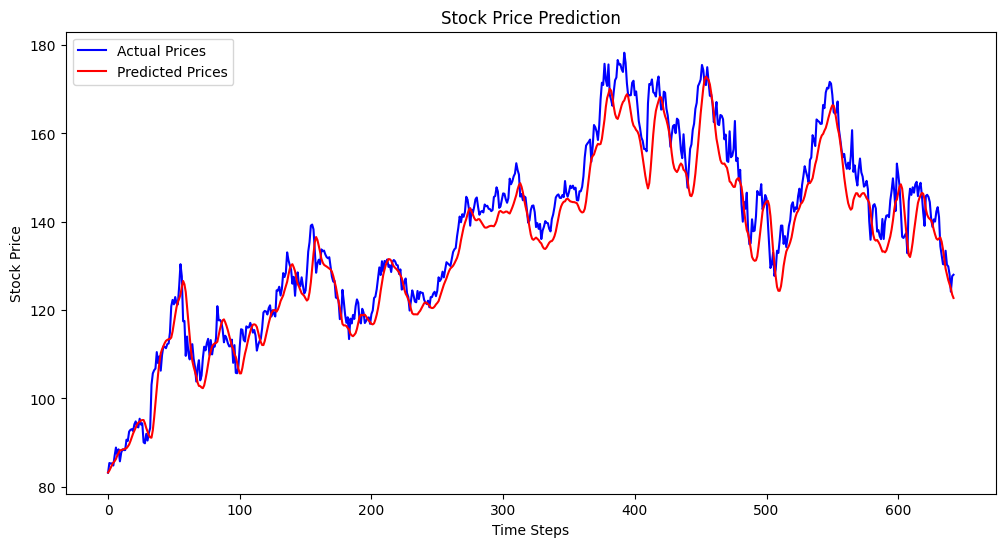

Generated plot comparing actual and predicted stock prices.


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Prices', color='blue')
plt.plot(predictions_actual, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

print("Generated plot comparing actual and predicted stock prices.")